In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
data = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Overcast"],
    "Humidity": ["High", "High", "High", "Normal", "Normal", "Normal"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Strong", "Strong"],
    "Play": ["No", "No", "Yes", "Yes", "No", "Yes"]
}

df = pd.DataFrame(data)
print(df)

    Outlook Humidity    Wind Play
0     Sunny     High    Weak   No
1     Sunny     High  Strong   No
2  Overcast     High    Weak  Yes
3      Rain   Normal    Weak  Yes
4      Rain   Normal  Strong   No
5  Overcast   Normal  Strong  Yes


In [3]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
print("\nEncoded Data :\n",df)


Encoded Data :
    Outlook  Humidity  Wind  Play
0        2         0     1     0
1        2         0     0     0
2        0         0     1     1
3        1         1     1     1
4        1         1     0     0
5        0         1     0     1


In [4]:
X= df.drop ("Play",axis= 1)
y=df["Play"]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

In [9]:
X_train

,Outlook,Humidity,Wind
5,0,1,0
2,0,0,1
4,1,1,0
3,1,1,1


In [10]:
X_test

,Outlook,Humidity,Wind
0,2,0,1
1,2,0,0


In [11]:
model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X_train , y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
y_pred = model.predict(X_test)
print("Predictions:",y_pred)

Predictions: [1 0]


In [13]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.5


In [17]:
new_data = pd.DataFrame([[2,1,2]], columns = X.columns)
prediction = model.predict(new_data)
print("New prediction:","Yes" if prediction [0] == 1 else "No")

New prediction: Yes


In [18]:
importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance :.3f}")

Outlook: 0.384
Humidity: 0.000
Wind: 0.616


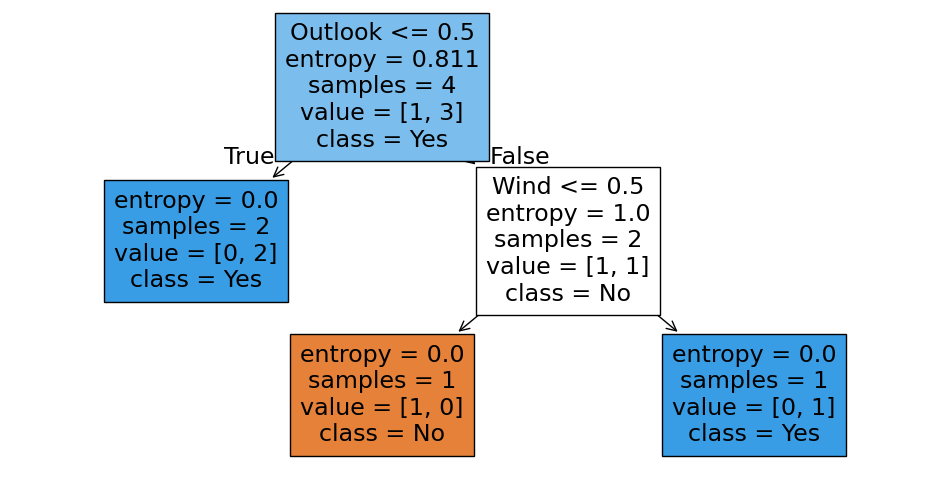

In [19]:
plt.figure(figsize=(12,6))
plot_tree(
    model,
    feature_names=X.columns,
    class_names= ["No","Yes"],
    filled= True
)
plt.show()